In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
loan=pd.read_csv("loan.csv")

C:\Users\rsjohn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option('display.max_columns', 60)

In [5]:
pd.set_option('display.max_rows', 60)

### Performing Data Cleaning

In [6]:
loan.shape

(39717, 111)

In [7]:
## Checking for Null Columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
## Dropping Null Columns
loan=loan.dropna(how = 'all', axis=1) 

In [9]:
loan.shape

(39717, 57)

In [10]:
# Checking for Null rows
loan.isnull().sum(axis=1)

0        4
1        3
2        5
3        2
4        1
        ..
39712    5
39713    5
39714    7
39715    7
39716    5
Length: 39717, dtype: int64

In [11]:
len(loan.columns)

57

In [12]:
## Find the percentage of null values in a row and sorting
round( 100 *(loan.isnull().sum(axis=1)/len(loan.columns)), 2 ).sort_values(ascending=False)

39659    14.04
39660    14.04
39715    12.28
39714    12.28
4714     12.28
         ...  
13631     0.00
7782      0.00
11439     0.00
3244      0.00
7664      0.00
Length: 39717, dtype: float64

## Filtering out columns based on consumer attributes, loan attributes, consumer behaviour attributes
## Consumer behaviour attributes would be ignored

In [13]:
con_attr=['loan_status','loan_amnt','dti','annual_inc','revol_util','emp_length','home_ownership','verification_status', 'purpose', 
      'inq_last_6mths', 'pub_rec','pub_rec_bankruptcies']

loan_attr=['loan_status','loan_amnt','funded_amnt' , 'funded_amnt_inv' , 'term' , 'int_rate' , 'installment', 'grade', 'sub_grade' , 'issue_d' ]

all_attr=['loan_status','loan_amnt','dti','annual_inc','revol_util','emp_length','home_ownership','verification_status', 'purpose', 
      'inq_last_6mths', 'pub_rec','pub_rec_bankruptcies',
          'funded_amnt' , 'funded_amnt_inv' , 'term' , 'int_rate' , 'installment', 'grade', 'sub_grade' , 'issue_d']

In [14]:
loan=loan[all_attr]

In [15]:
# Dropping records with loan_status as Current 
loan=loan[~(loan.loan_status=='Current')]

In [16]:
loan.shape

(38577, 20)

In [17]:
## Checking for nulls
round( 100 *(loan.isnull().sum()/len(loan.index)), 2 )

loan_status             0.00
loan_amnt               0.00
dti                     0.00
annual_inc              0.00
revol_util              0.13
emp_length              2.68
home_ownership          0.00
verification_status     0.00
purpose                 0.00
inq_last_6mths          0.00
pub_rec                 0.00
pub_rec_bankruptcies    1.81
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
issue_d                 0.00
dtype: float64

In [18]:
# Removing "months" from column "term"
loan['term']=loan.term.apply(lambda x:x.replace('months',''))

In [19]:
# Replacing % sign in the "int_rate" column
loan['int_rate']=loan.int_rate.apply(lambda x:x.replace('%',''))

In [20]:
## Checking most frequent value for Emp_length in all loan_status values
## In both groups of loan status 10+ years are the most frequent
loan.groupby(['loan_status','emp_length']).loan_amnt.count()

loan_status  emp_length
Charged Off  1 year         456
             10+ years     1331
             2 years        567
             3 years        555
             4 years        462
             5 years        458
             6 years        307
             7 years        263
             8 years        203
             9 years        158
             < 1 year       639
Fully Paid   1 year        2713
             10+ years     7157
             2 years       3724
             3 years       3457
             4 years       2880
             5 years       2736
             6 years       1861
             7 years       1448
             8 years       1232
             9 years       1068
             < 1 year      3869
Name: loan_amnt, dtype: int64

In [21]:
loan.emp_length.isnull().sum()

1033

In [22]:
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [23]:
# Imputing the mode value for emp_length
loan['emp_length']= loan['emp_length'].fillna(loan.emp_length.mode()[0])

In [24]:
loan.emp_length.isnull().sum()

0

In [25]:
loan['emp_length']=loan.emp_length.apply(lambda x:x.replace('10+ years','10.1'))
loan['emp_length']=loan.emp_length.apply(lambda x:x.replace('< 1 year','0.9'))
loan['emp_length']=loan.emp_length.apply(lambda x:x.replace('1 year','1'))
loan['emp_length']=loan.emp_length.apply(lambda x:x.replace(' years',''))


In [26]:
# Cleaning up revol_util column by using mode
loan.revol_util.mode()[0]

'0%'

In [27]:
loan.revol_util.value_counts()

0%        954
63%        62
0.20%      62
31.20%     57
40.70%     57
         ... 
8.49%       1
0.49%       1
57.56%      1
88.48%      1
10.08%      1
Name: revol_util, Length: 1088, dtype: int64

In [28]:
loan.revol_util.isnull().sum()

50

In [29]:
loan['revol_util']= loan['revol_util'].fillna(loan.revol_util.mode()[0])

In [30]:
loan['revol_util']=loan.revol_util.apply(lambda x:x.replace('%',''))

In [31]:
loan.revol_util.value_counts()

0        1004
63         62
0.20       62
40.70      57
31.20      57
         ... 
7.43        1
24.66       1
5.33        1
0.54        1
10.08       1
Name: revol_util, Length: 1088, dtype: int64

In [32]:
round( 100 *(loan.isnull().sum()/len(loan.index)), 2 )

loan_status             0.00
loan_amnt               0.00
dti                     0.00
annual_inc              0.00
revol_util              0.00
emp_length              0.00
home_ownership          0.00
verification_status     0.00
purpose                 0.00
inq_last_6mths          0.00
pub_rec                 0.00
pub_rec_bankruptcies    1.81
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
issue_d                 0.00
dtype: float64

In [33]:
# Checking issue_d
loan.issue_d.isnull().sum()

0

In [34]:
loan['issue_d'] = loan['issue_d'].apply(lambda x:'01-' + x )

In [35]:
loan['issue_d']=loan['issue_d'].astype("datetime64[ns]")

In [36]:
loan['issued_year']=loan.issue_d.apply(lambda x:x.year)

In [37]:
# Imputing with zero for pub_rec_bankruptcies
loan.pub_rec_bankruptcies.mode()
loan['pub_rec_bankruptcies']= loan['pub_rec_bankruptcies'].fillna(0)

In [38]:
round( 100 *(loan.isnull().sum()/len(loan.index)), 2 )

loan_status             0.0
loan_amnt               0.0
dti                     0.0
annual_inc              0.0
revol_util              0.0
emp_length              0.0
home_ownership          0.0
verification_status     0.0
purpose                 0.0
inq_last_6mths          0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
issue_d                 0.0
issued_year             0.0
dtype: float64

In [39]:
loan.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [40]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_status           38577 non-null  object        
 1   loan_amnt             38577 non-null  int64         
 2   dti                   38577 non-null  float64       
 3   annual_inc            38577 non-null  float64       
 4   revol_util            38577 non-null  object        
 5   emp_length            38577 non-null  object        
 6   home_ownership        38577 non-null  object        
 7   verification_status   38577 non-null  object        
 8   purpose               38577 non-null  object        
 9   inq_last_6mths        38577 non-null  int64         
 10  pub_rec               38577 non-null  int64         
 11  pub_rec_bankruptcies  38577 non-null  float64       
 12  funded_amnt           38577 non-null  int64         
 13  funded_amnt_inv 

In [41]:
## Converting to appropriate data types
loan['term']=loan.term.astype("float")
loan['int_rate']=loan.int_rate.astype("float")
loan['grade']=loan.grade.astype("string")
loan['sub_grade']=loan.sub_grade.astype("string")
loan['emp_length']=loan.emp_length.astype("float")

loan['home_ownership']=loan['home_ownership'].astype("string")
loan['verification_status']=loan['verification_status'].astype("string")

loan['loan_status']=loan['loan_status'].astype("string")

loan['revol_util']=loan['revol_util'].astype("float")

loan['purpose']=loan['purpose'].astype("string")

In [42]:
## Creating a Derived column to be used as Target variable for folowing analysis.
## Loan_status is considered as the target variable.
loan['target_col']=loan.loan_status.apply(lambda x: 1 if (x=='Charged Off') else 0 )

In [43]:
loan['target_col'].value_counts()

0    32950
1     5627
Name: target_col, dtype: int64

In [44]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: Int64

## UniVariate Analysis

In [45]:
# Defining a function to create a bar plot. To be used to perform Univariate analysis on different columns
def sns_bar(col_name, xlab , ptitle ):
    fig = sns.barplot(x=col_name, y="target_col", data=loan )
    fig.set(xlabel=xlab, ylabel='Default Rate', title=ptitle )
    

## Observation: More defaulting happens in the 60 month term even though it is only for 25% of the loans

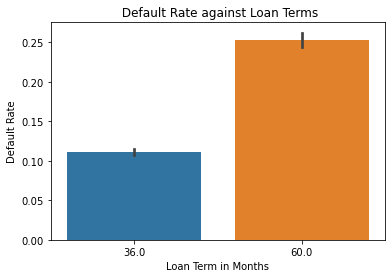

In [46]:
sns_bar("term" , "Loan Term in Months" , " Default Rate against Loan Terms")

In [47]:
loan.term.value_counts()

36.0    29096
60.0     9481
Name: term, dtype: int64

### Creating Bins

In [48]:
ln_bin=[0,10000,15000,20000,25000,30000,40000]
ln_lbl=['0-10k','10k-15k','15K-20k','20k-25k','25k-30k','30k-40k']
loan['amt_range']=pd.cut(loan.loan_amnt,bins=ln_bin,labels=ln_lbl)

In [49]:
la_bin=[0,20000,35000,50000,75000,100000,3000000]
la_lbl=['20k','20-35k','35-50k','50-75k','75-100k','100k+']
loan['inc_range']=pd.cut(loan.annual_inc,bins=la_bin,labels=la_lbl)

In [50]:
dti_bin=[0,5,10,15,20,25,30]
dti_lbl=['5%','5-10%','10-15%','15-20%','20-25%','25-30%']
loan['dti_range']=pd.cut(loan.dti,bins=dti_bin,labels=dti_lbl)

## DTI Range: The variation in default rate is from 12.5% to 16%. Not much of a trend.

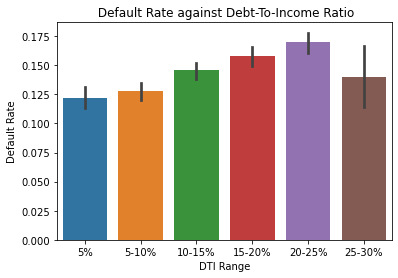

In [51]:
sns_bar("dti_range", "DTI Range" , " Default Rate against Debt-To-Income Ratio")

## Income Range: Defaulting reduces as income increases

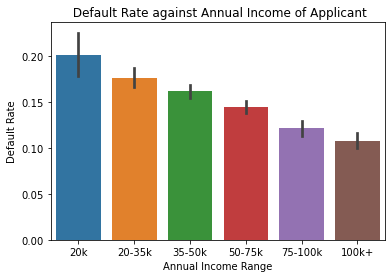

In [52]:
sns_bar("inc_range" , "Annual Income Range" , " Default Rate against Annual Income of Applicant" )

## Loan Amount Range: Defaulting Increases and Loan Amount increases

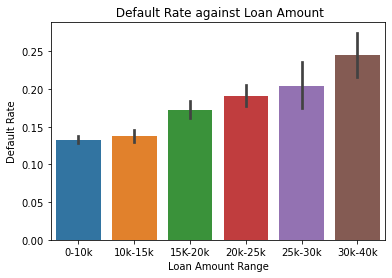

In [53]:
sns_bar('amt_range',"Loan Amount Range" , " Default Rate against Loan Amount")

In [54]:
## Binning Interest Rate

int_bin=[0,5,10,15,20,25,30]
int_lbl=['5%','5-10%','10-15%','15-20%','20-25%','25-30%']
loan['int_range']=pd.cut(loan.int_rate,bins=int_bin,labels=int_lbl)

## Interest Rate: Defaulting Increases as the Interest Rate increases

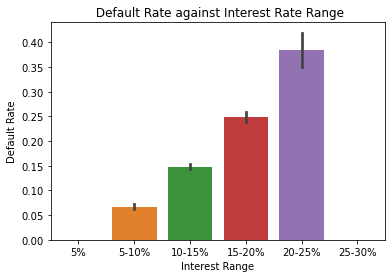

In [55]:
sns_bar('int_range', "Interest Range" , " Default Rate against Interest Rate Range")

In [56]:
# Checking Employment Length
loan.emp_length.value_counts()

10.1    9521
0.9     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

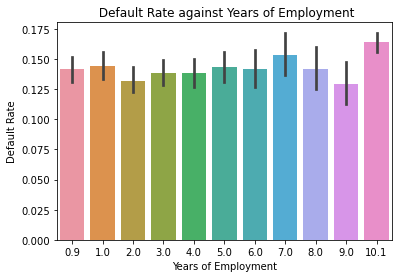

In [57]:
sns_bar('emp_length', "Years of Employment" , " Default Rate against Years of Employment")

In [58]:
## Binning emp_length

emp_bin=[0,0.95,4,7,10,12]
emp_lbl=['<1','1-4','5-7','8-10','10+']
loan['emp_range']=pd.cut(loan.emp_length,bins=emp_bin,labels=emp_lbl)

## Employment Length Range: There is not much of a trend. Defaulting is uniform across all ranges

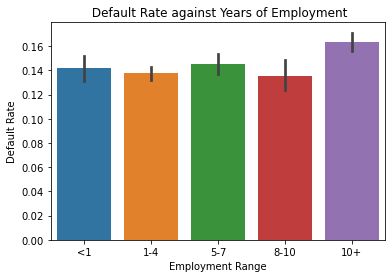

In [59]:
sns_bar('emp_range', "Employment Range" , " Default Rate against Years of Employment")

## Checking Revolving Utilization Rate:

In [60]:
rutil_bin=[0,10,25,40,60,100]
rutil_lbl=['0-10%','10-25%','25-40%','40-60%','60-100%']
loan['rutil_range']=pd.cut(loan.revol_util,bins=rutil_bin,labels=rutil_lbl)

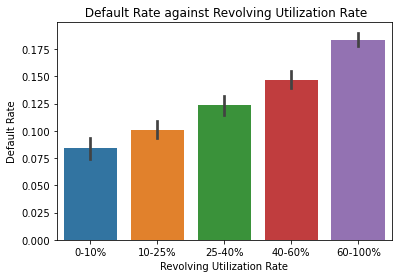

In [61]:
## Defaulting increases as the Revolving Utilization rate increases
sns_bar('rutil_range', "Revolving Utilization Rate" , " Default Rate against Revolving Utilization Rate")

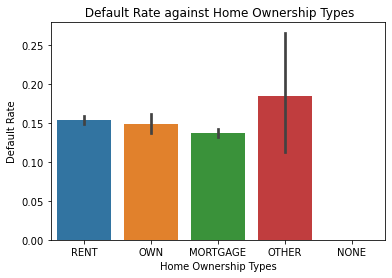

In [62]:
## Checking home_ownership: Not much of a trend  
sns_bar('home_ownership', "Home Ownership Types" , " Default Rate against Home Ownership Types")

## Checking Purpose:
## Observation: There is a significant Percentage increase in defaulting when the purpose in small business

[Text(0, 0.5, 'Loan Purpose'),
 Text(0.5, 0, 'Default Rate '),
 Text(0.5, 1.0, 'Loan Purpose against Default Rate')]

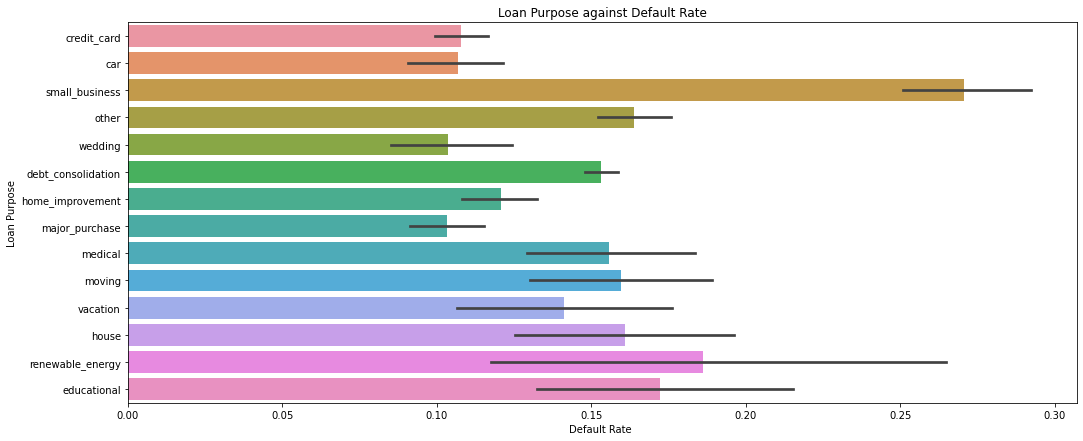

In [63]:
plt.figure(figsize=(17,7))
fig = sns.barplot(x="target_col", y='purpose', data=loan)
fig.set(xlabel="Default Rate ", ylabel='Loan Purpose', title="Loan Purpose against Default Rate" )


## Checking Verification Status: There is no trend.
## Observation: Maybe LC needs to improve the verification process since the verified accounts have more defaults than unverified

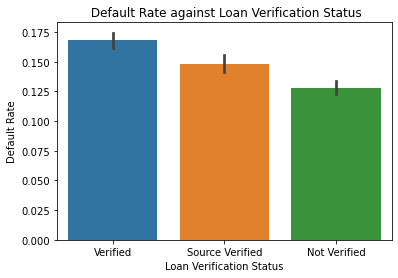

In [64]:
sns_bar('verification_status', "Loan Verification Status" , " Default Rate against Loan Verification Status")

## Checking Grade: As the grade increases, defaulting increases.
## The defaulting also increases as the subgrade increases. Some variation is seen in G grade.

[Text(0, 0.5, 'Loan Risk Grade'),
 Text(0.5, 0, 'Default Rate '),
 Text(0.5, 1.0, 'Loan Risk Grade against Default Rate')]

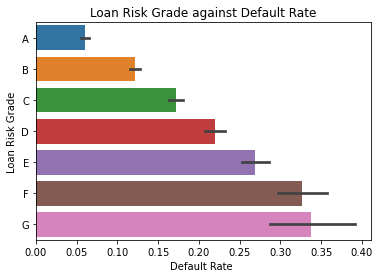

In [65]:
fig = sns.barplot(x="target_col", y='grade', data=loan , order = ['A', 'B','C','D','E','F','G'])
fig.set(xlabel="Default Rate ", ylabel='Loan Risk Grade', title="Loan Risk Grade against Default Rate" )

[Text(0, 0.5, 'Loan Risk Sub-Grade'),
 Text(0.5, 0, 'Default Rate '),
 Text(0.5, 1.0, 'Loan Risk Sub-Grade against Default Rate')]

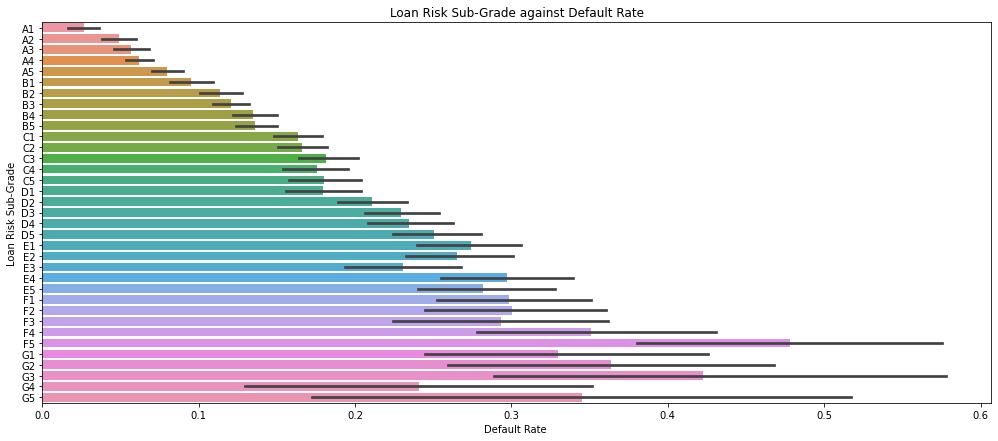

In [66]:
plt.figure(figsize=(17,7))
fig = sns.barplot(x="target_col", y='sub_grade', data=loan, 
            order = ['A1','A2','A3','A4','A5', 'B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'] )
fig.set(xlabel="Default Rate ", ylabel='Loan Risk Sub-Grade', title="Loan Risk Sub-Grade against Default Rate" )

## Checking "Inquiry in last 6 months". A slight saw-tooth trend but no conclusive statement can be made

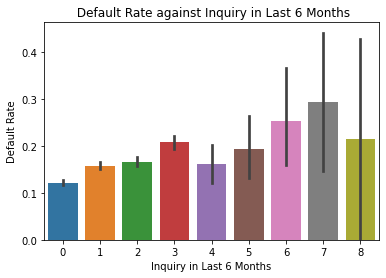

In [67]:
sns_bar('inq_last_6mths', "Inquiry in Last 6 Months" , " Default Rate against Inquiry in Last 6 Months")

## Checking Public Record of Bankruptcies: Having 2 or more bankruptcies in the person's record should be a warning sign

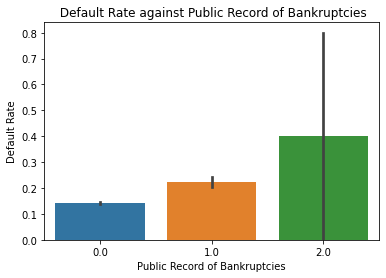

In [68]:
sns_bar('pub_rec_bankruptcies', "Public Record of Bankruptcies" , " Default Rate against Public Record of Bankruptcies")

### Bi-Variate Analysis

In [69]:
# Custom function to plot bi-variate analysis graphs
def bi_bar(col1,col2 , xlab , ptitle ):
    plt.figure(figsize=(22,7))
    fig = sns.barplot(x=col1 , y='target_col', hue=col2, data=loan)
    fig.set(xlabel=xlab, ylabel='Default Rate', title=ptitle )
    

### Checking Loan Amount and Purpose

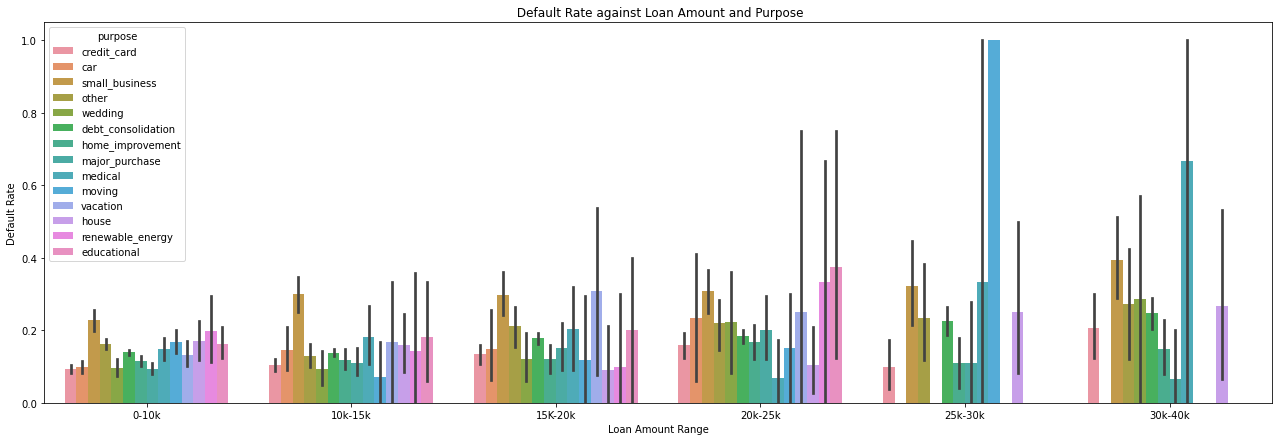

In [70]:
## Checking Loan Amount and Purpose. It generally seems similar across different loan amounts. 
bi_bar('amt_range', 'purpose' , "Loan Amount Range" , " Default Rate against Loan Amount and Purpose")

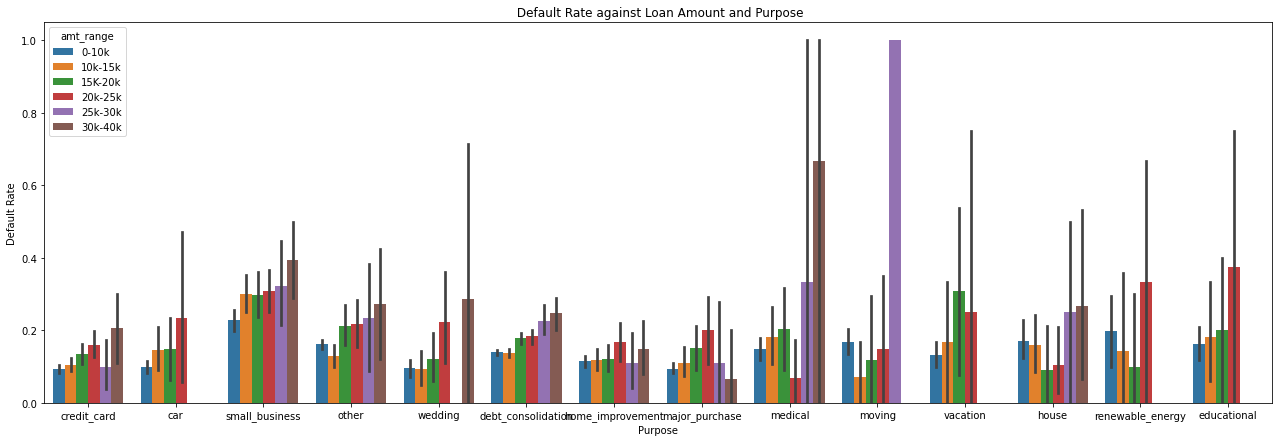

In [71]:
# on switching the axes, Small business has more defaulting than other purposes for loan amount ranges
bi_bar('purpose', 'amt_range', "Purpose" , " Default Rate against Loan Amount and Purpose")

In [72]:
loan[loan.target_col==1].purpose.value_counts()

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: purpose, dtype: Int64

In [73]:
ln=loan[loan.purpose.isin(['debt_consolidation','credit_card','other','small_business'])]

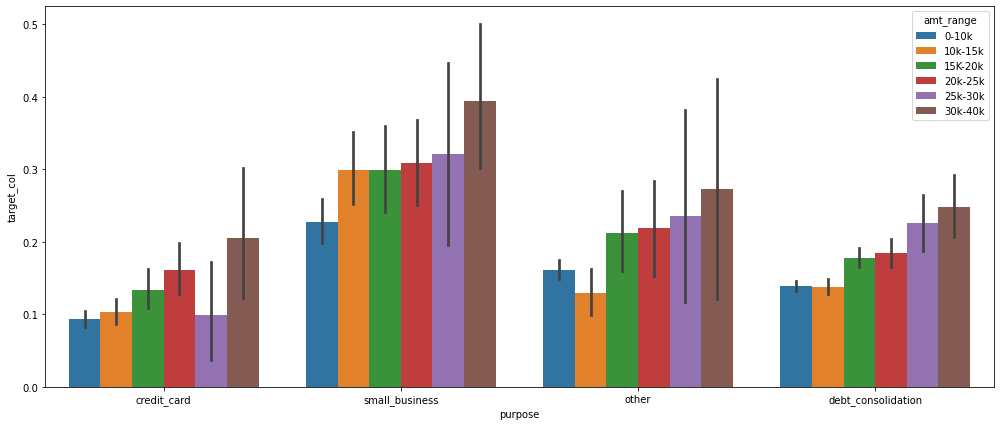

In [74]:
# Bivariate - Small business has the highest default across all income range
plt.figure(figsize=(17,7))
sns.barplot(x='purpose', y='target_col', hue='amt_range', data=ln)

### Checking Loan Amount and Grade

[Text(0, 0.5, 'Default Rate'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Default Rate against Grade and Loan Amount')]

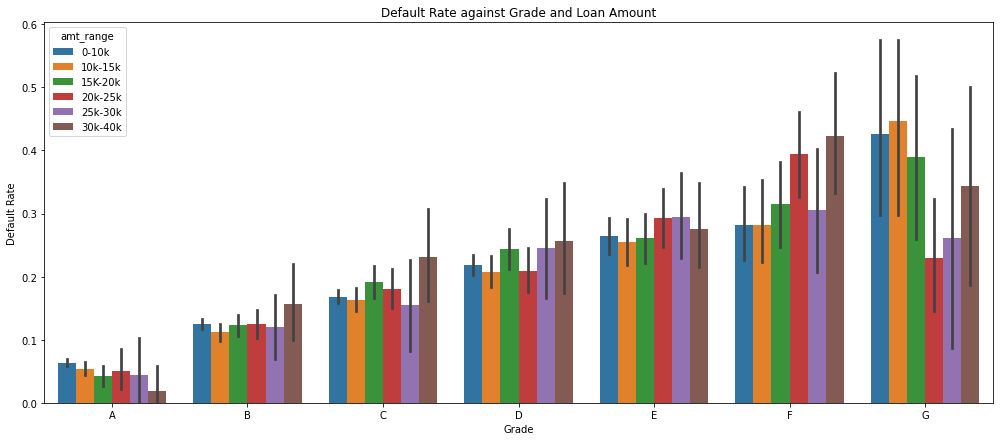

In [75]:
## Consider how they grade because above 20K income F grade has defaulted more than G grade
## A grade at above 30K has least default
plt.figure(figsize=(17,7))
fig = sns.barplot(x='grade' , y='target_col', hue='amt_range', data=loan , order = ['A', 'B','C','D','E','F','G'])
fig.set(xlabel='Grade', ylabel='Default Rate', title="Default Rate against Grade and Loan Amount" )

## Checking Term and Purpose
### for 60 momths -> educational loan defaulters more than doubles 0.2 to above 0.4 
### similar observation for : credit_card, small_business(significant) 
### -> consider giving for lesser term for all of above

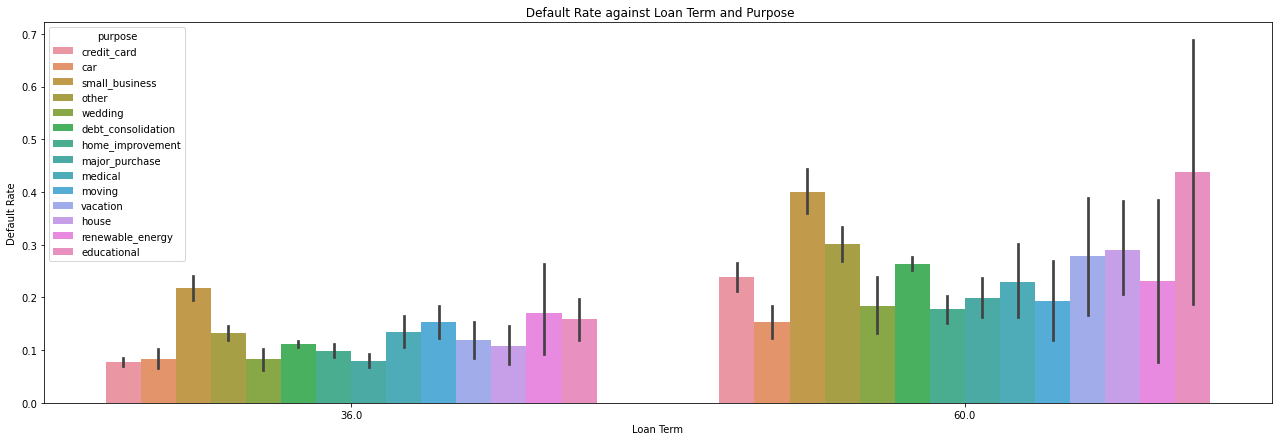

In [76]:
bi_bar('term','purpose', "Loan Term" , " Default Rate against Loan Term and Purpose")

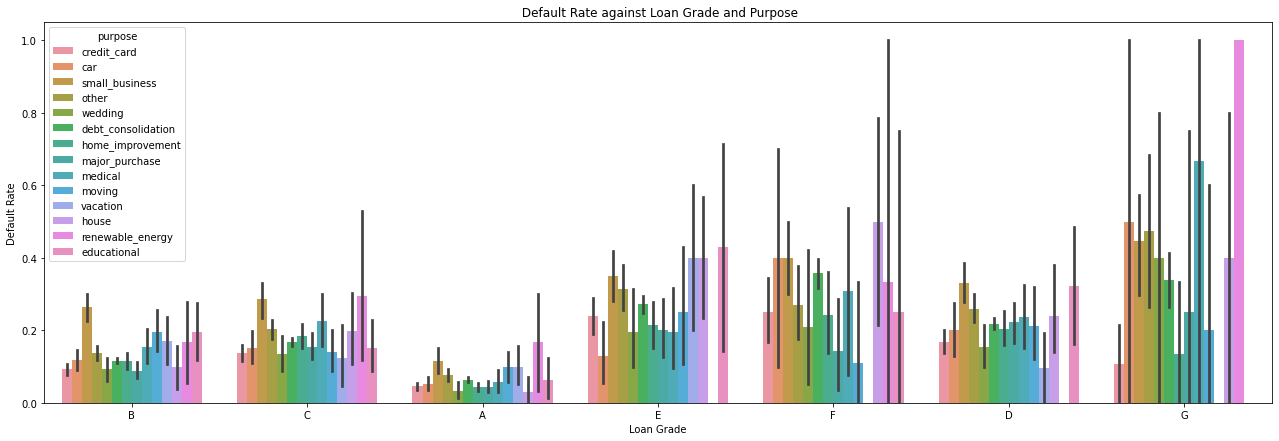

In [77]:
## Checking grade and purpose
bi_bar('grade','purpose', "Loan Grade" , " Default Rate against Loan Grade and Purpose")
## grade is a good indicator of defaulting whatever maybe the purpose

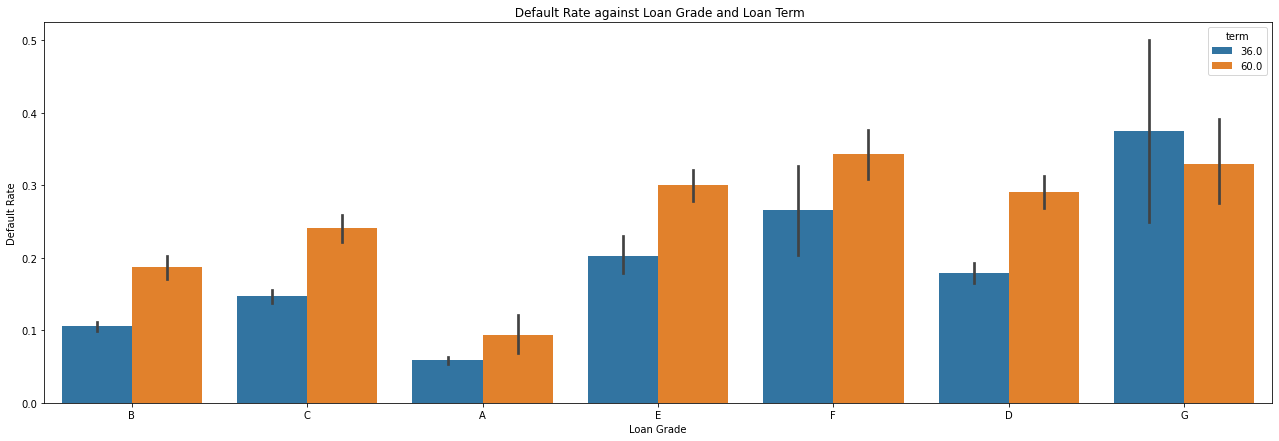

In [78]:
# Cheecking grade and Term
bi_bar('grade','term', "Loan Grade" , " Default Rate against Loan Grade and Loan Term")
## for all grades except G , term of 60 is having more defaulter

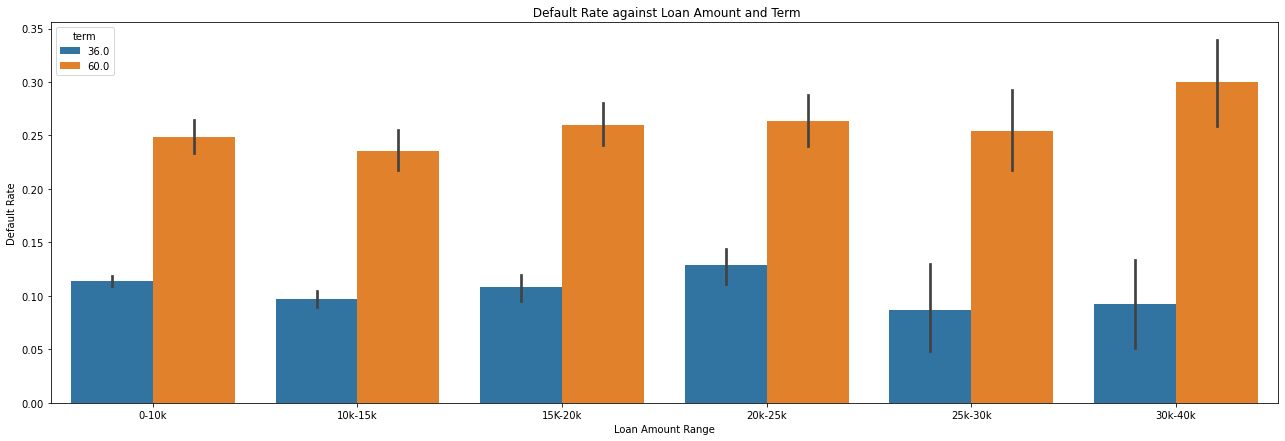

In [79]:
## Checking Loan amount and Term
bi_bar('amt_range','term', "Loan Amount Range" , " Default Rate against Loan Amount and Term")
## across amt_range, 60 terms is defaulting more

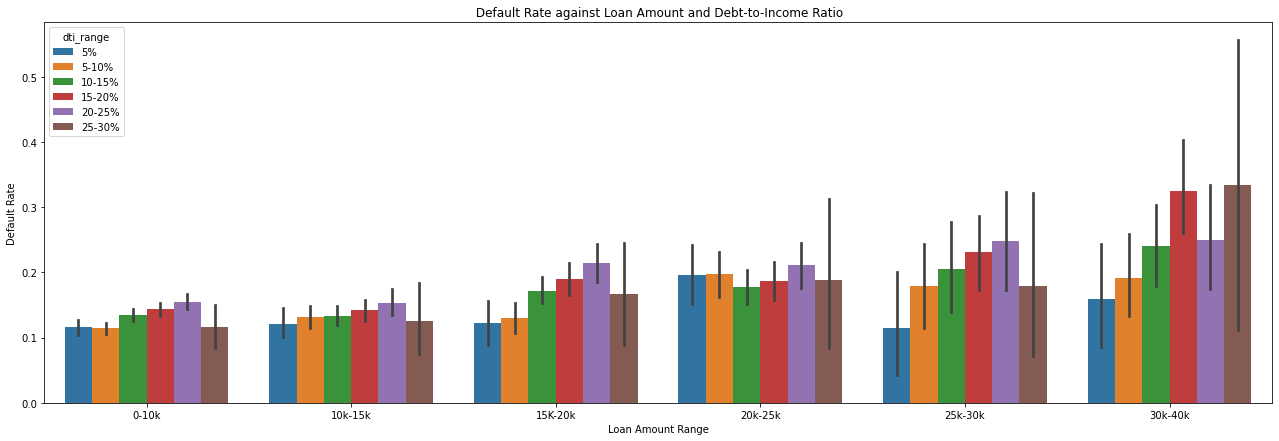

In [80]:
## Checking Loan Amount and dti_range: not much of a trend
bi_bar('amt_range','dti_range', "Loan Amount Range" , " Default Rate against Loan Amount and Debt-to-Income Ratio")

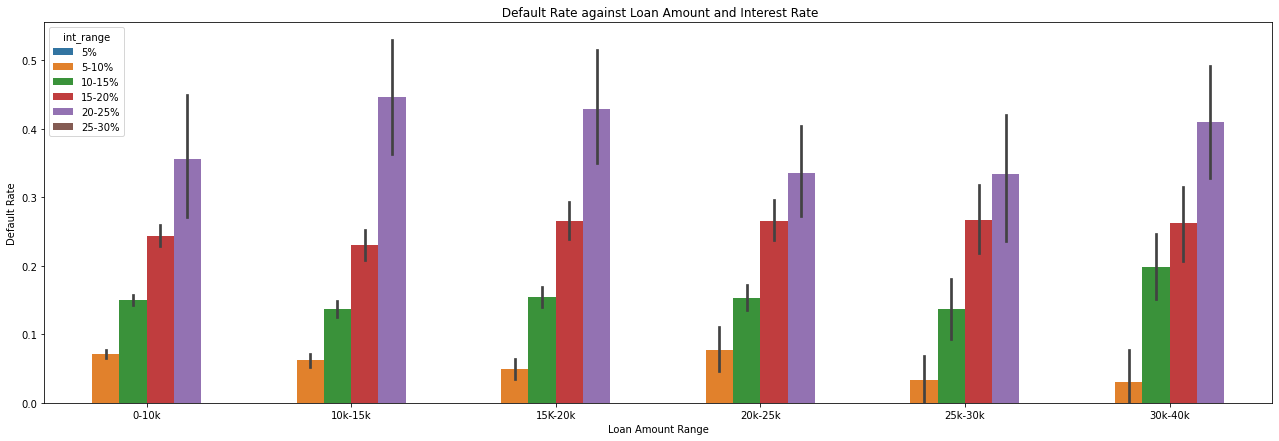

In [81]:
## Checking loan amount and Interest range: For a given loan amount, defaulting increases as Interest rate increases
bi_bar('amt_range','int_range', "Loan Amount Range" , " Default Rate against Loan Amount and Interest Rate")
## int_range increases , default increases

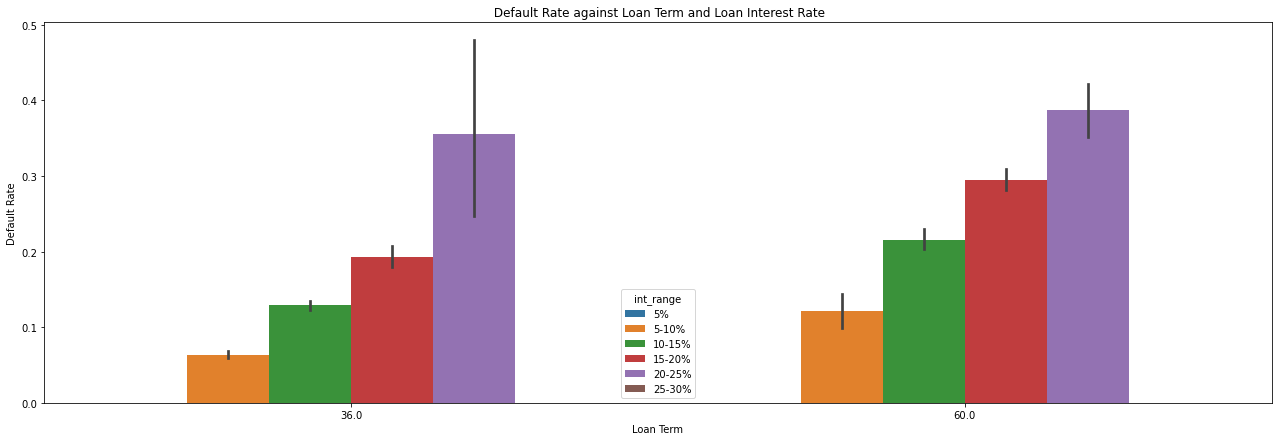

In [82]:
# Checking Term and Interest range. Higher Term and higher interest rate  has more defaulting
bi_bar('term','int_range', "Loan Term" , " Default Rate against Loan Term and Loan Interest Rate")

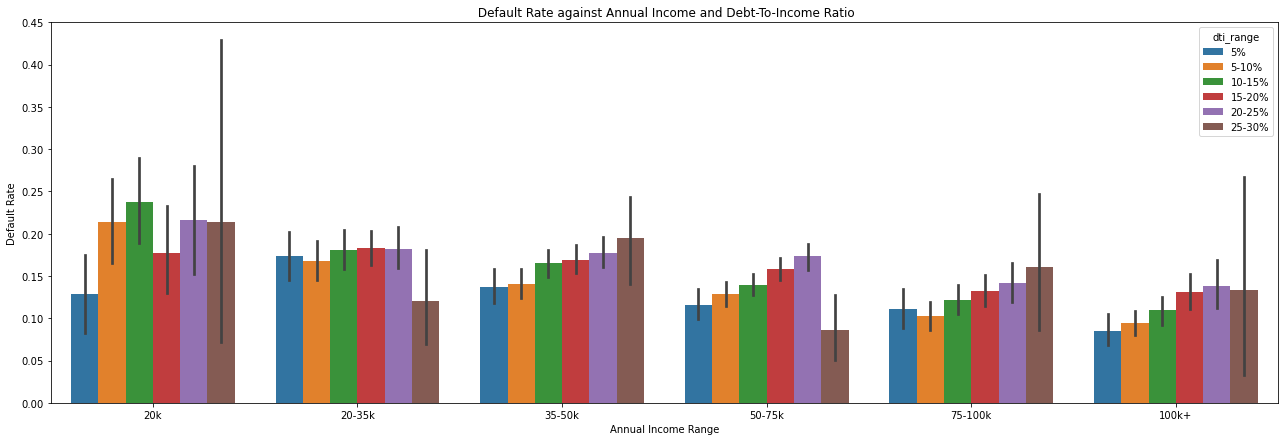

In [83]:
## Checking Income Range and DTI. Not much trend, Other than what was already observed for income groups
bi_bar('inc_range','dti_range', "Annual Income Range" , " Default Rate against Annual Income and Debt-To-Income Ratio")

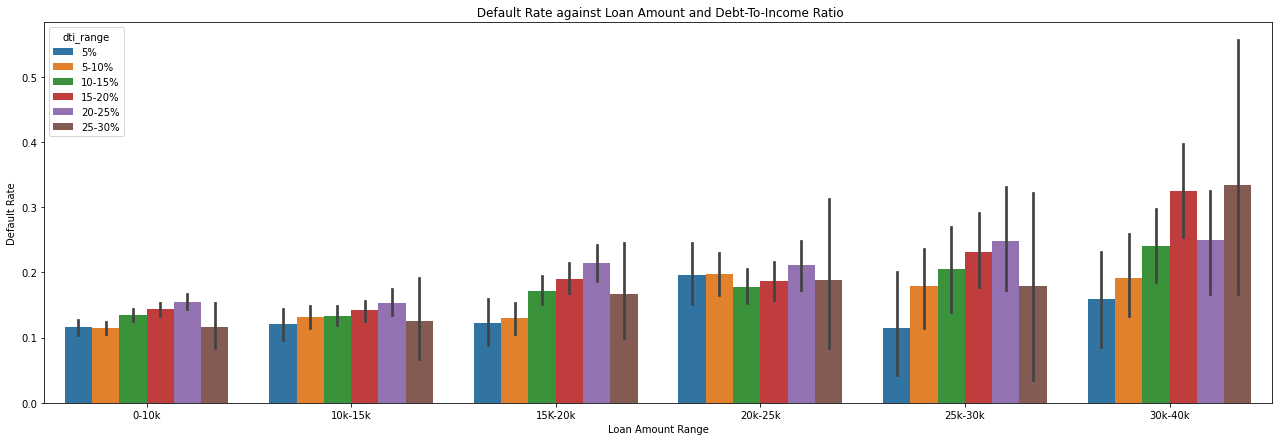

In [84]:
bi_bar('amt_range','dti_range', "Loan Amount Range" , " Default Rate against Loan Amount and Debt-To-Income Ratio")

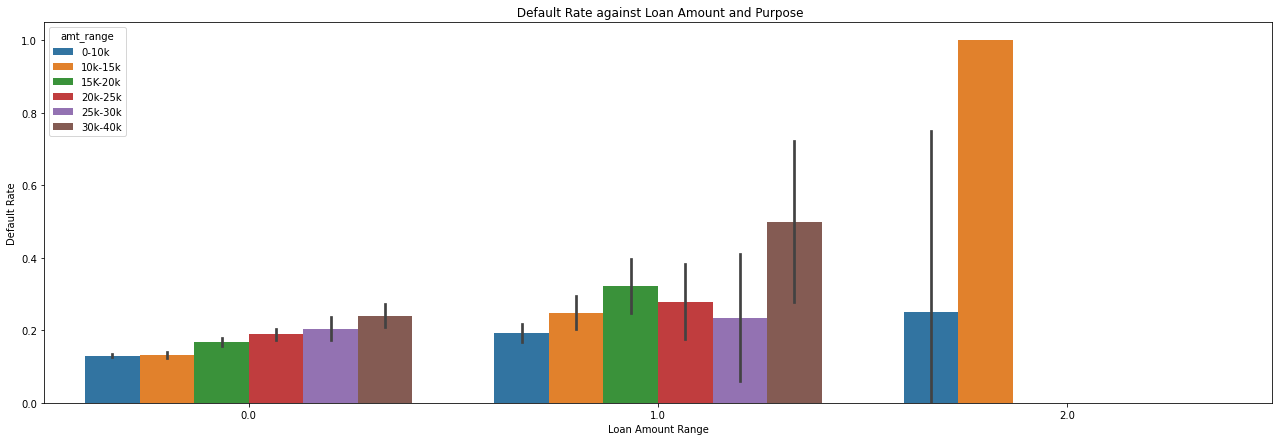

In [85]:
## Checking Pblic bankruptcy records and Loan amount
## Higher lon amount was not given to people with more bankruptcy records
bi_bar('pub_rec_bankruptcies', 'amt_range', "Loan Amount Range" , " Default Rate against Loan Amount and Purpose")

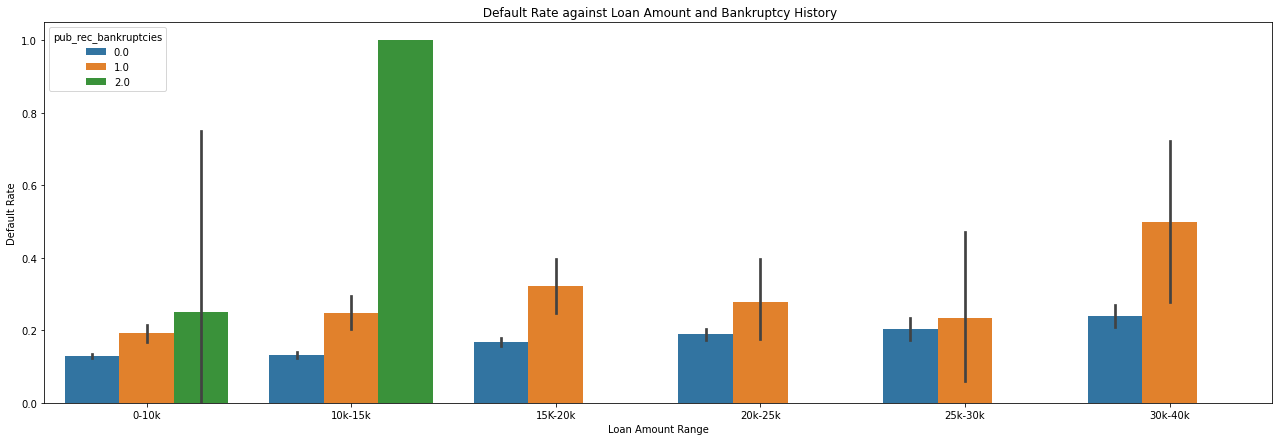

In [86]:
bi_bar('amt_range','pub_rec_bankruptcies', "Loan Amount Range" , " Default Rate against Loan Amount and Bankruptcy History")
# pub_rec_bankruptcies if present then it should be a warning.

In [87]:
## Checking Installment. 
## Binning Installment

inst_bin=[0,500,1000,1500]
inst_lbl=['L','M','H']
loan['inst_range']=pd.cut(loan.installment,bins=inst_bin,labels=inst_lbl)

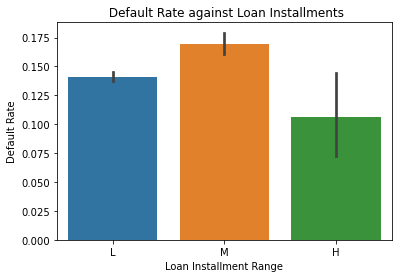

In [88]:
sns_bar('inst_range', "Loan Installment Range" , " Default Rate against Loan Installments")

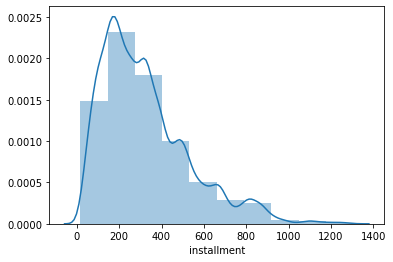

In [89]:
sns.distplot(loan['installment'],hist=True, bins=10);

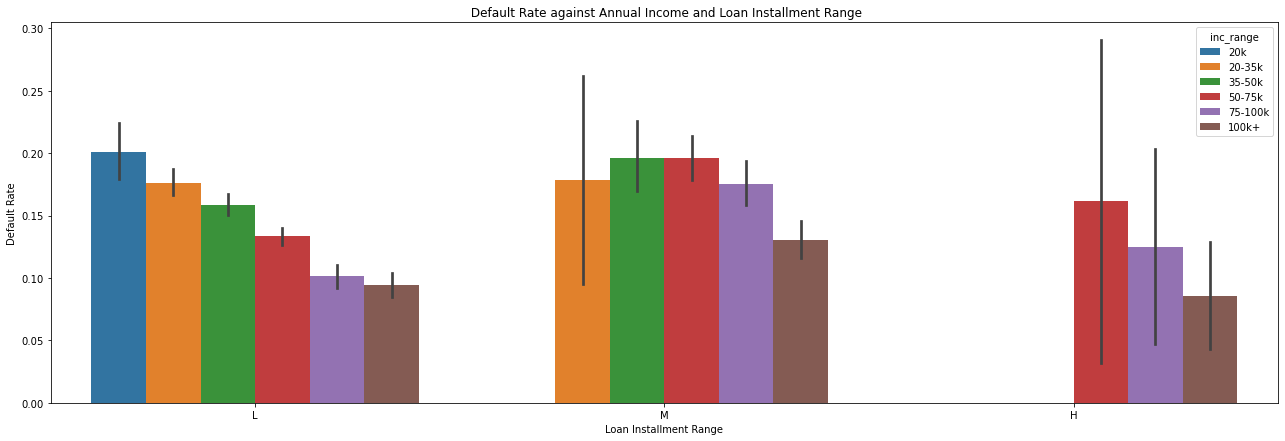

In [90]:
bi_bar('inst_range','inc_range', "Loan Installment Range" , " Default Rate against Annual Income and Loan Installment Range")
## Low income people are not having high installment

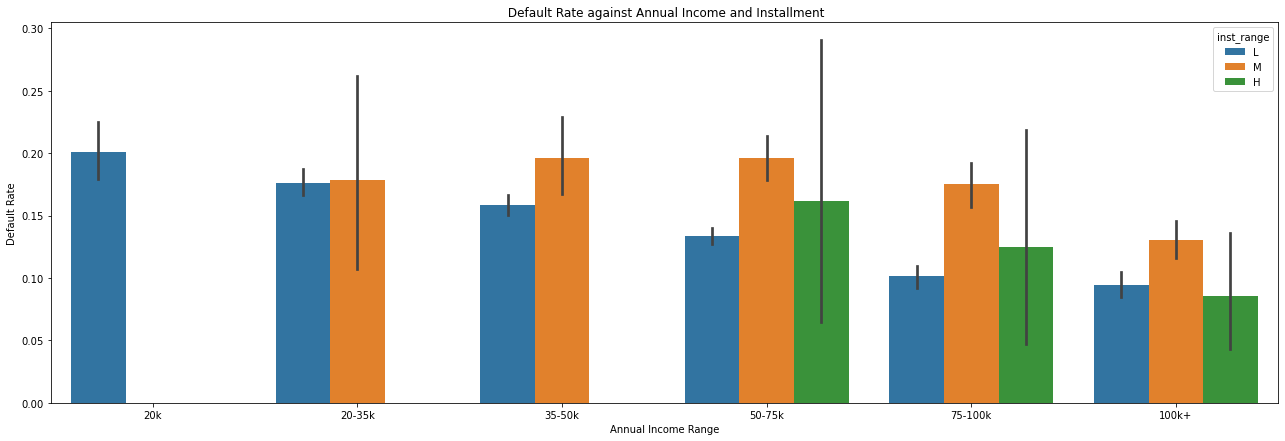

In [91]:
bi_bar('inc_range','inst_range', "Annual Income Range" , " Default Rate against Annual Income and Installment")
# as income incresases and installment descreses, defaulting desreases

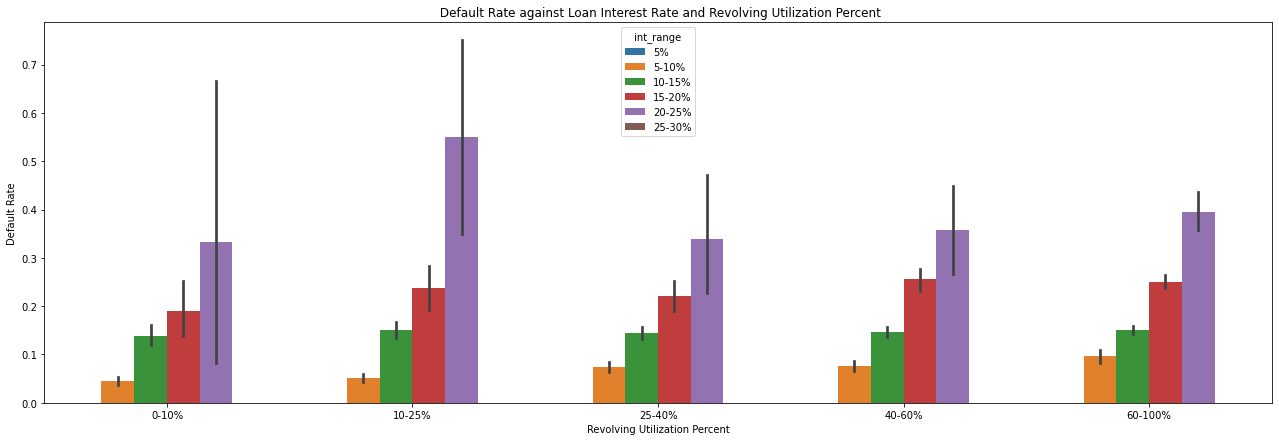

In [92]:
bi_bar('rutil_range','int_range', "Revolving Utilization Percent" , " Default Rate against Loan Interest Rate and Revolving Utilization Percent")

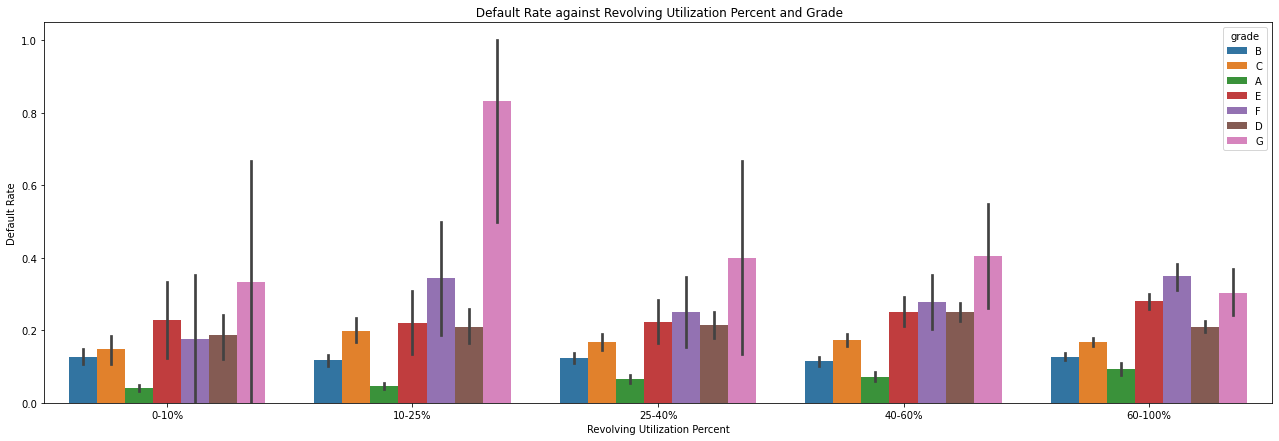

In [93]:
bi_bar('rutil_range','grade', "Revolving Utilization Percent" , " Default Rate against Revolving Utilization Percent and Grade")

[Text(0, 0.5, 'Default Rate'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Default Rate against Revolving Utilization Percent and Grade')]

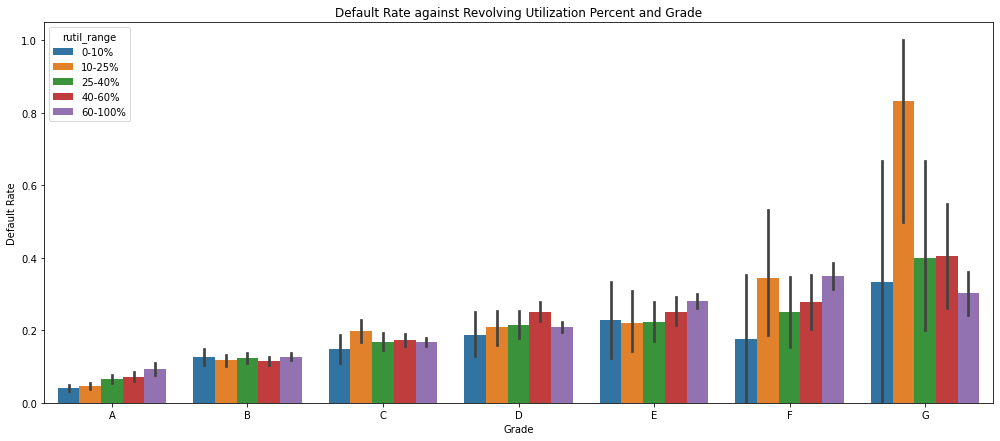

In [94]:
plt.figure(figsize=(17,7))
fig = sns.barplot(x='grade', y='target_col', hue='rutil_range', data=loan, order=['A','B','C','D','E','F','G'])
fig.set(xlabel="Grade", ylabel='Default Rate', title="Default Rate against Revolving Utilization Percent and Grade" )

# Multivariate Analysis

In [95]:
ht_all_attr=['loan_status','loan_amnt','funded_amnt' , 'funded_amnt_inv' ,   'installment' ,'annual_inc','term' , 'int_rate' ,'emp_length',
             'dti','revol_util','home_ownership','verification_status', 'purpose', 
           'inq_last_6mths', 'pub_rec','pub_rec_bankruptcies',
           'grade', 'sub_grade' , 'issue_d']
lmap_cor=loan[ht_all_attr].corr()

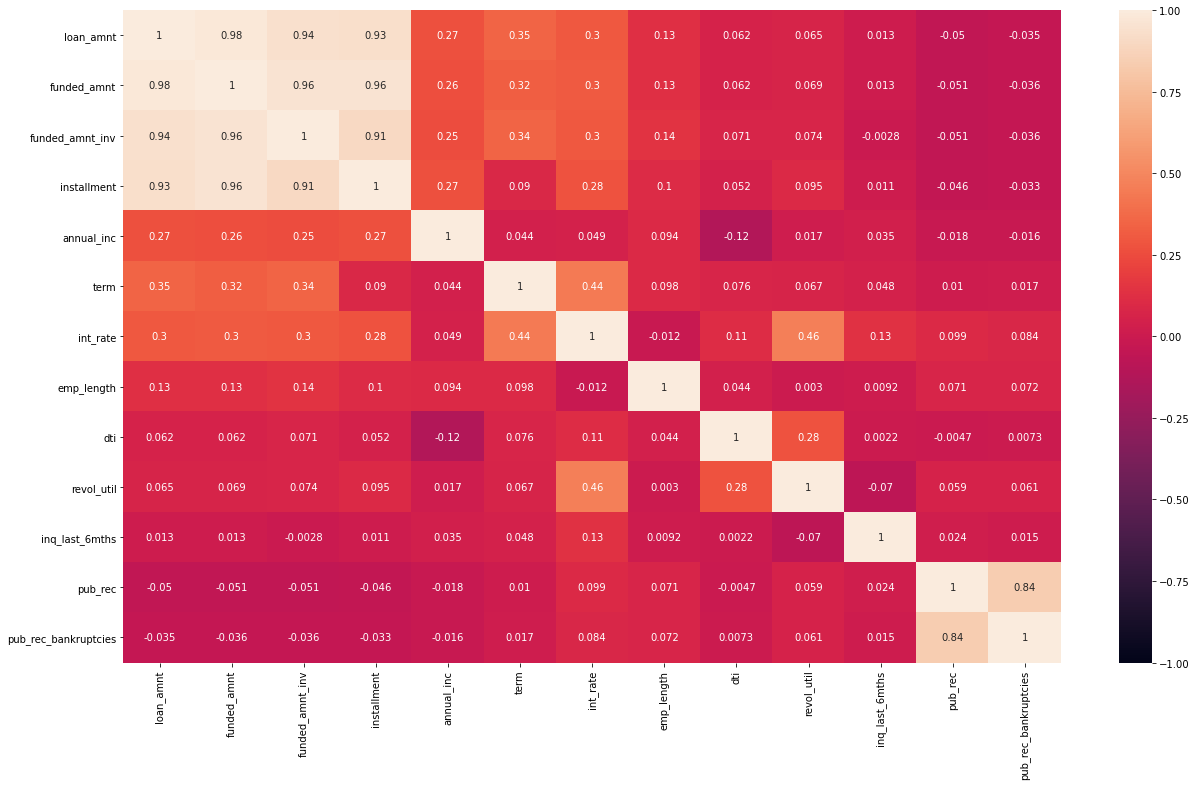

In [96]:
plt.figure(figsize=(21,12))
sns.heatmap(lmap_cor,annot=True,vmin=-1.0,vmax=1.0)

## Observation: 
There is a negative co-relation between Funded_amount/Funded_amount_inv and pub_rec/pub_rec_bankruptcies
There is a negative co-relation between annual income and dti
There is a positive co-relation between Funded_amount/Funded_amount_inv and term and interest rate